In [ ]:
import numpy as np
from keras import datasets
from keras import models,layers
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import backend


# 1. DataLoader
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape[:])

# 2. 입력 데이터 전처리하기
H,W = X_train.shape[1:]

'''
입력 데이터가 2차원일 때 전처리 과정 중 채널 정보를 확인하는 과정이 중요하다
흑백은 채널정보가 따로 없지만 그래도 1이라는 값을 추가해줘야 한다.
컬러는 채널 정보가 3으로 존재한다.

또한 채널은 다른 정보의 앞에 올 수도 / 뒤에 붙을 수도 있다.
                        Channel First/ Channel last
backend 모듈 사용한다.
'''
# 전처리 1) 채널정보 가공  
channel = backend.image_data_format()
channel

if backend.image_data_format() == "channels_first":
    X_train = X_train.reshape(X_train[0].shape[0],1,H,W) # X_train[0] 대신에 -1 써도 동일한 표현
    X_test = X_test.reshape(X_test.shape[0],1,H,W)
    input_shape = (1,H,W) # 채널이 앞으로 간다
else:
    X_train = X_train.reshape(X_train.shape[0],H,W,1) # X_train[0] 대신에 -1 써도 동일한 표현
    X_test = X_test.reshape(X_test.shape[0],H,W,1)
    input_shape = (H,W,1) # 채널이 뒤로 간다

# 전처리 2) 스케일링
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# 전처리 3) 원핫인코딩
Y_train = np_utils.to_categorical(y_train) # 앞 문자를 대문자로 바꿨다..전처리 했다.
Y_test = np_utils.to_categorical(y_test)

print(Y_train[0])

## 3. 모델 생성하기
model = keras.models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

# 위에서 나온 2차원 이미지 값들을 1차원으로 펼쳐서 FCN을 만든다.
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation="softmax"))

# 4. compile
model.compile("rmsprop","categorical_crossentropy","accuracy")

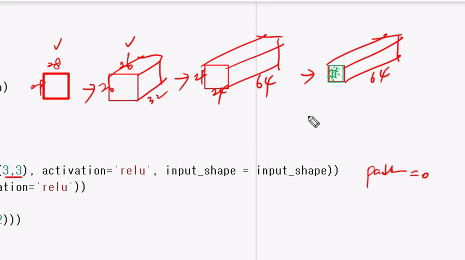

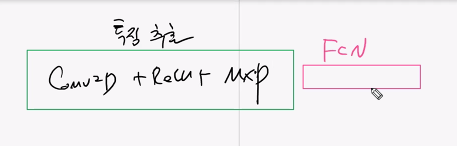

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history["loss"]) # history 안에 history에 들어가야 dict값을 받을 수 있음
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train","Validation"])

def plot_acc(history):
    plt.plot(history.history["accuracy"]) # history 안에 history에 들어가야 dict값을 받을 수 있음
    plt.plot(history.history["val_accuracy"])
    plt.title("Model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train","Validation"])

# fit...학습할 때 나오는 로그메시지들을 다 모아서 리턴한다...history
history = model.fit(X_train, Y_train, epochs= 20, batch_size=128, validation_split=0.2)
score = model.evaluate(X_test,Y_test)

print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1])

plot_loss(history)
plot_acc(history)
plt.show()